In [51]:
#Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [52]:
df=pd.read_csv('data_week2.csv', encoding='cp949')
df

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [53]:
#df.shape 122400 X 10
#60개의 건물 X 85일 24시간 =122400
df.shape

(122400, 10)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [55]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


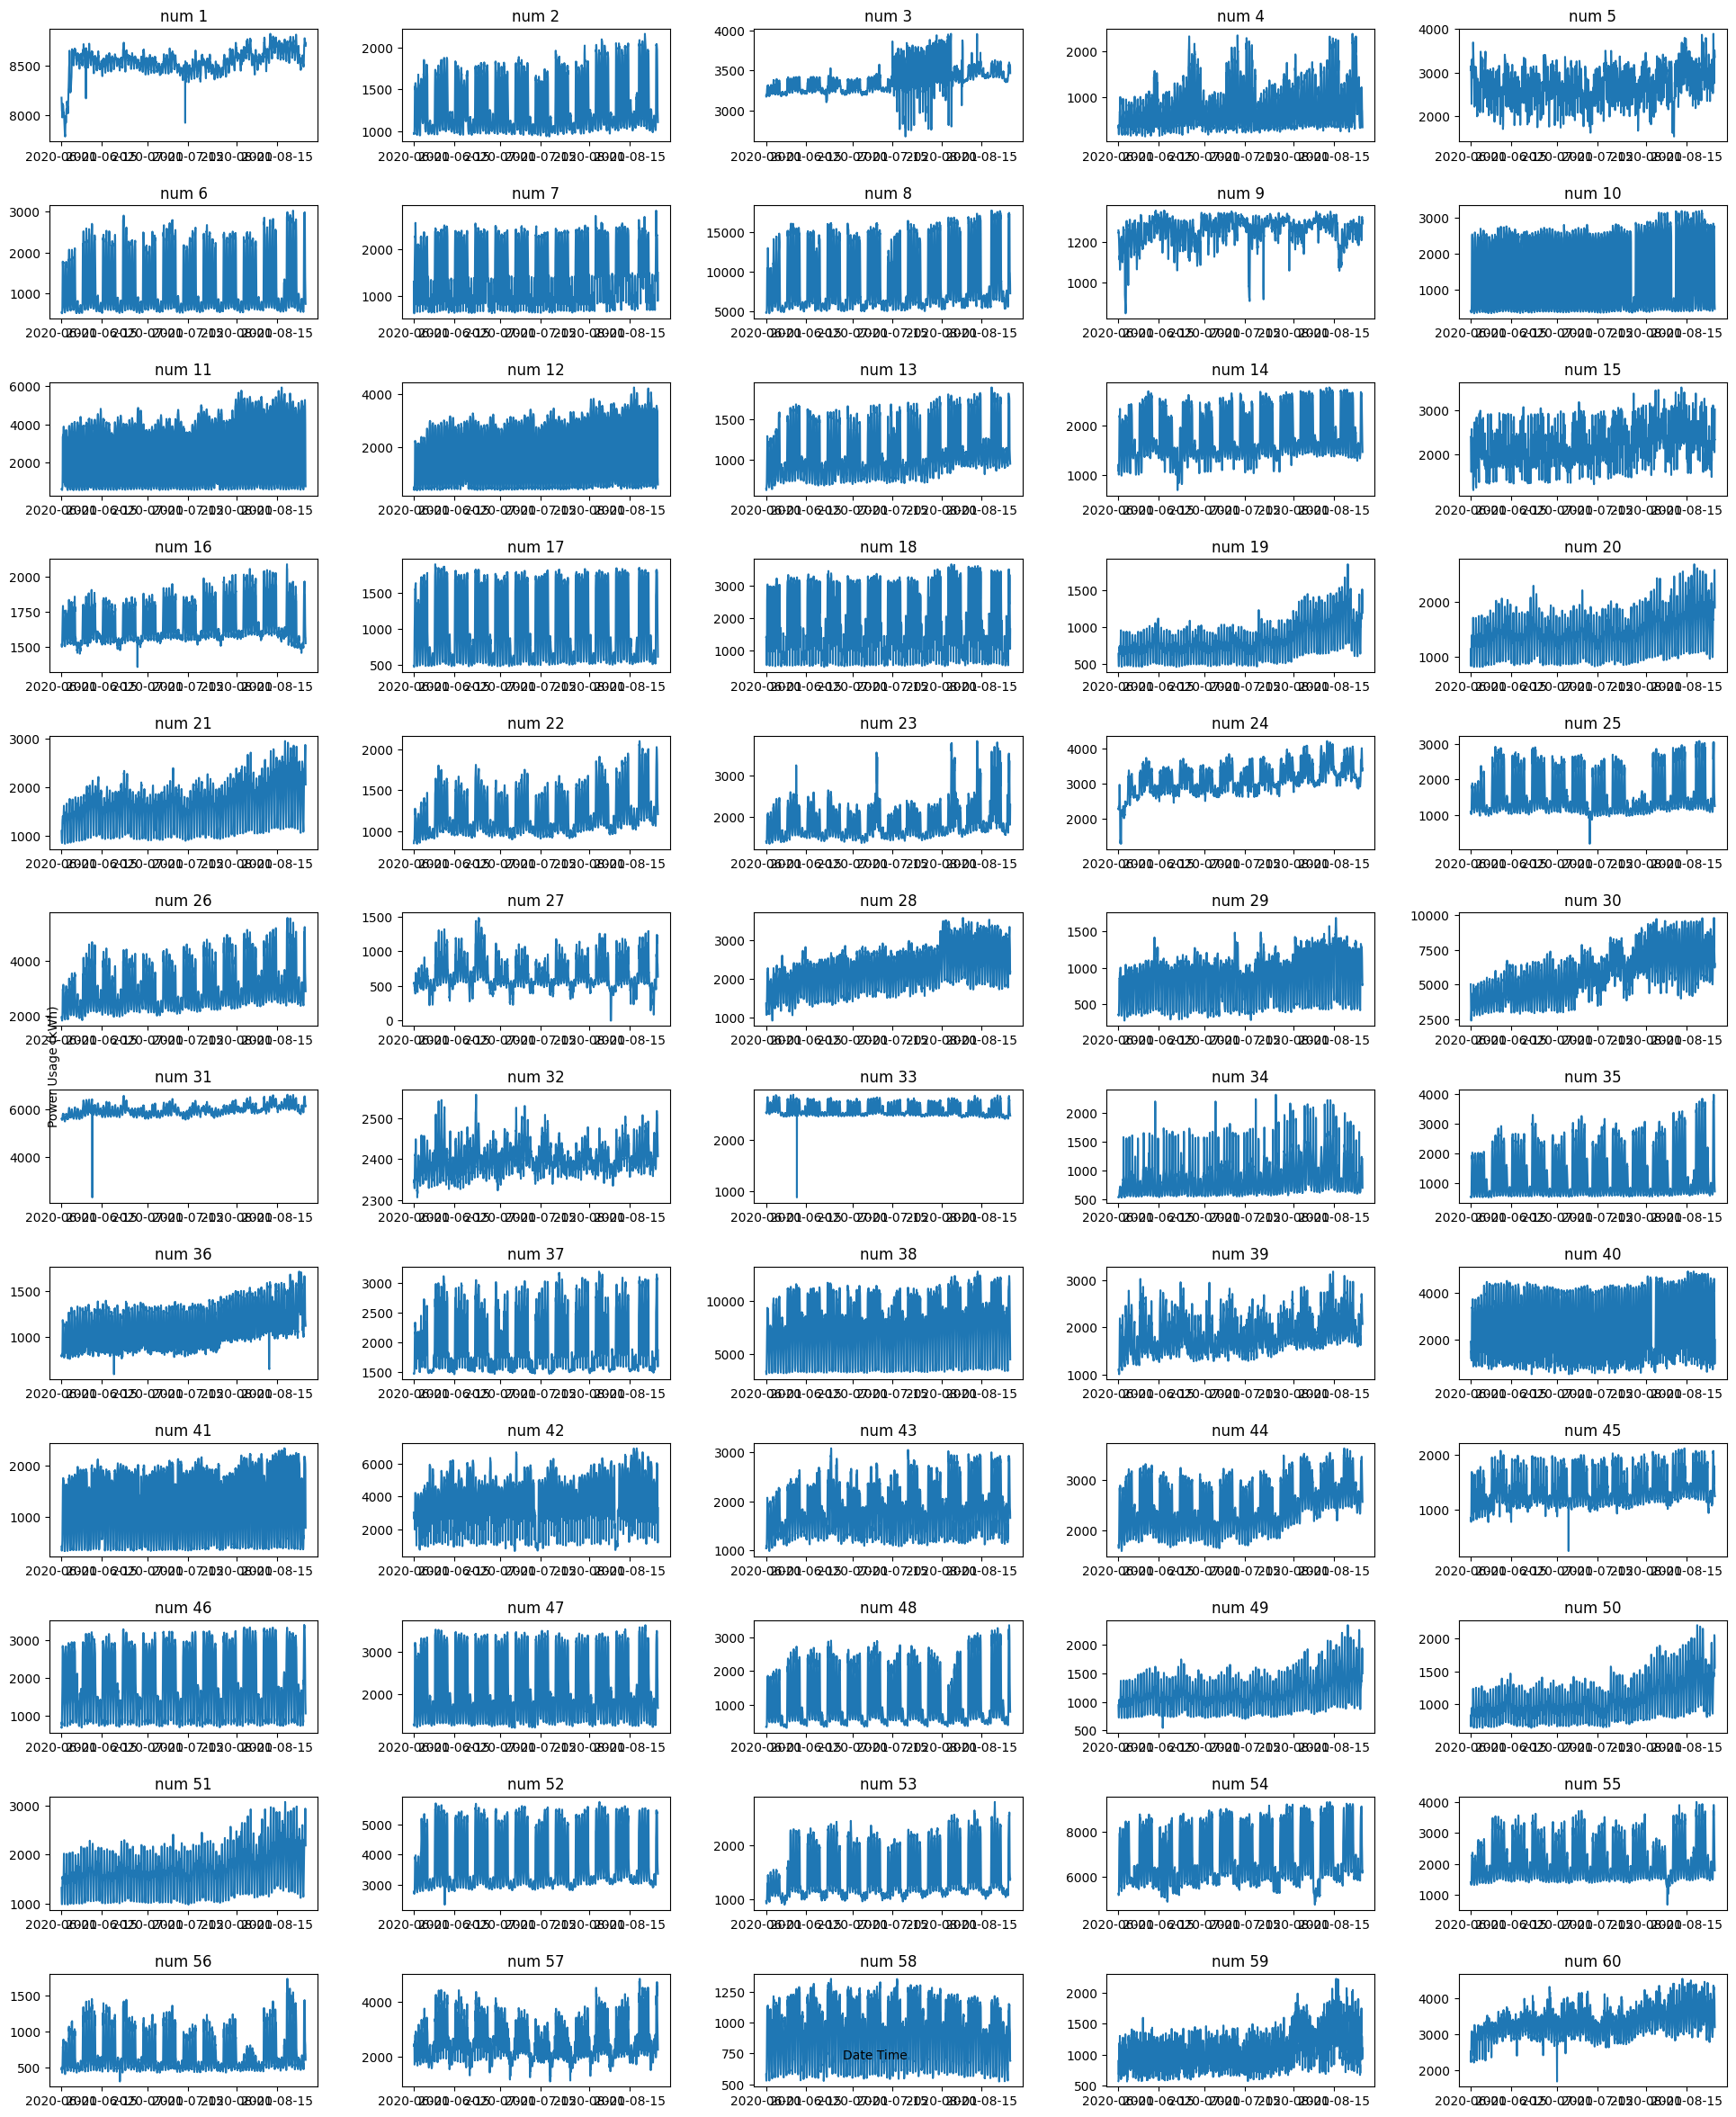

In [56]:
# 12행 5열의 서브플롯 생성
fig, axes = plt.subplots(12, 5, figsize=(20, 24))
fig.tight_layout(pad=3.0)

# 각 num 값에 대해 서브플롯에 그래프 그리기
for i in range(1, 61):
    row = (i - 1) // 5  # 행 인덱스
    col = (i - 1) % 5   # 열 인덱스
    sns.lineplot(data=df.query(f'num=={i}'), x='date_time', y='전력사용량(kWh)', ax=axes[row, col])
    axes[row, col].set_title(f'num {i}')  # 각 서브플롯 제목 설정
    axes[row, col].set_xlabel('')         # X축 레이블 제거 (필요 시 추가 가능)
    axes[row, col].set_ylabel('')         # Y축 레이블 제거 (필요 시 추가 가능)

# 메인 X축과 Y축 레이블 설정
fig.text(0.5, 0.04, 'Date Time', ha='center')
fig.text(0.04, 0.5, 'Power Usage (kWh)', va='center', rotation='vertical')

plt.show()

In [57]:
import numpy as np
df.groupby('num', as_index=False).agg(
    비전기난방=('비전기냉방설비운영', lambda x: sum(x)),
    태양광보유=('태양광보유', lambda x: sum(x))
)

,num,비전기난방,태양광보유
0,1,0.0,0.0
1,2,2040.0,0.0
2,3,2040.0,2040.0
3,4,2040.0,2040.0
4,5,2040.0,0.0
5,6,0.0,0.0
6,7,2040.0,0.0
7,8,2040.0,2040.0
8,9,0.0,2040.0
9,10,2040.0,0.0


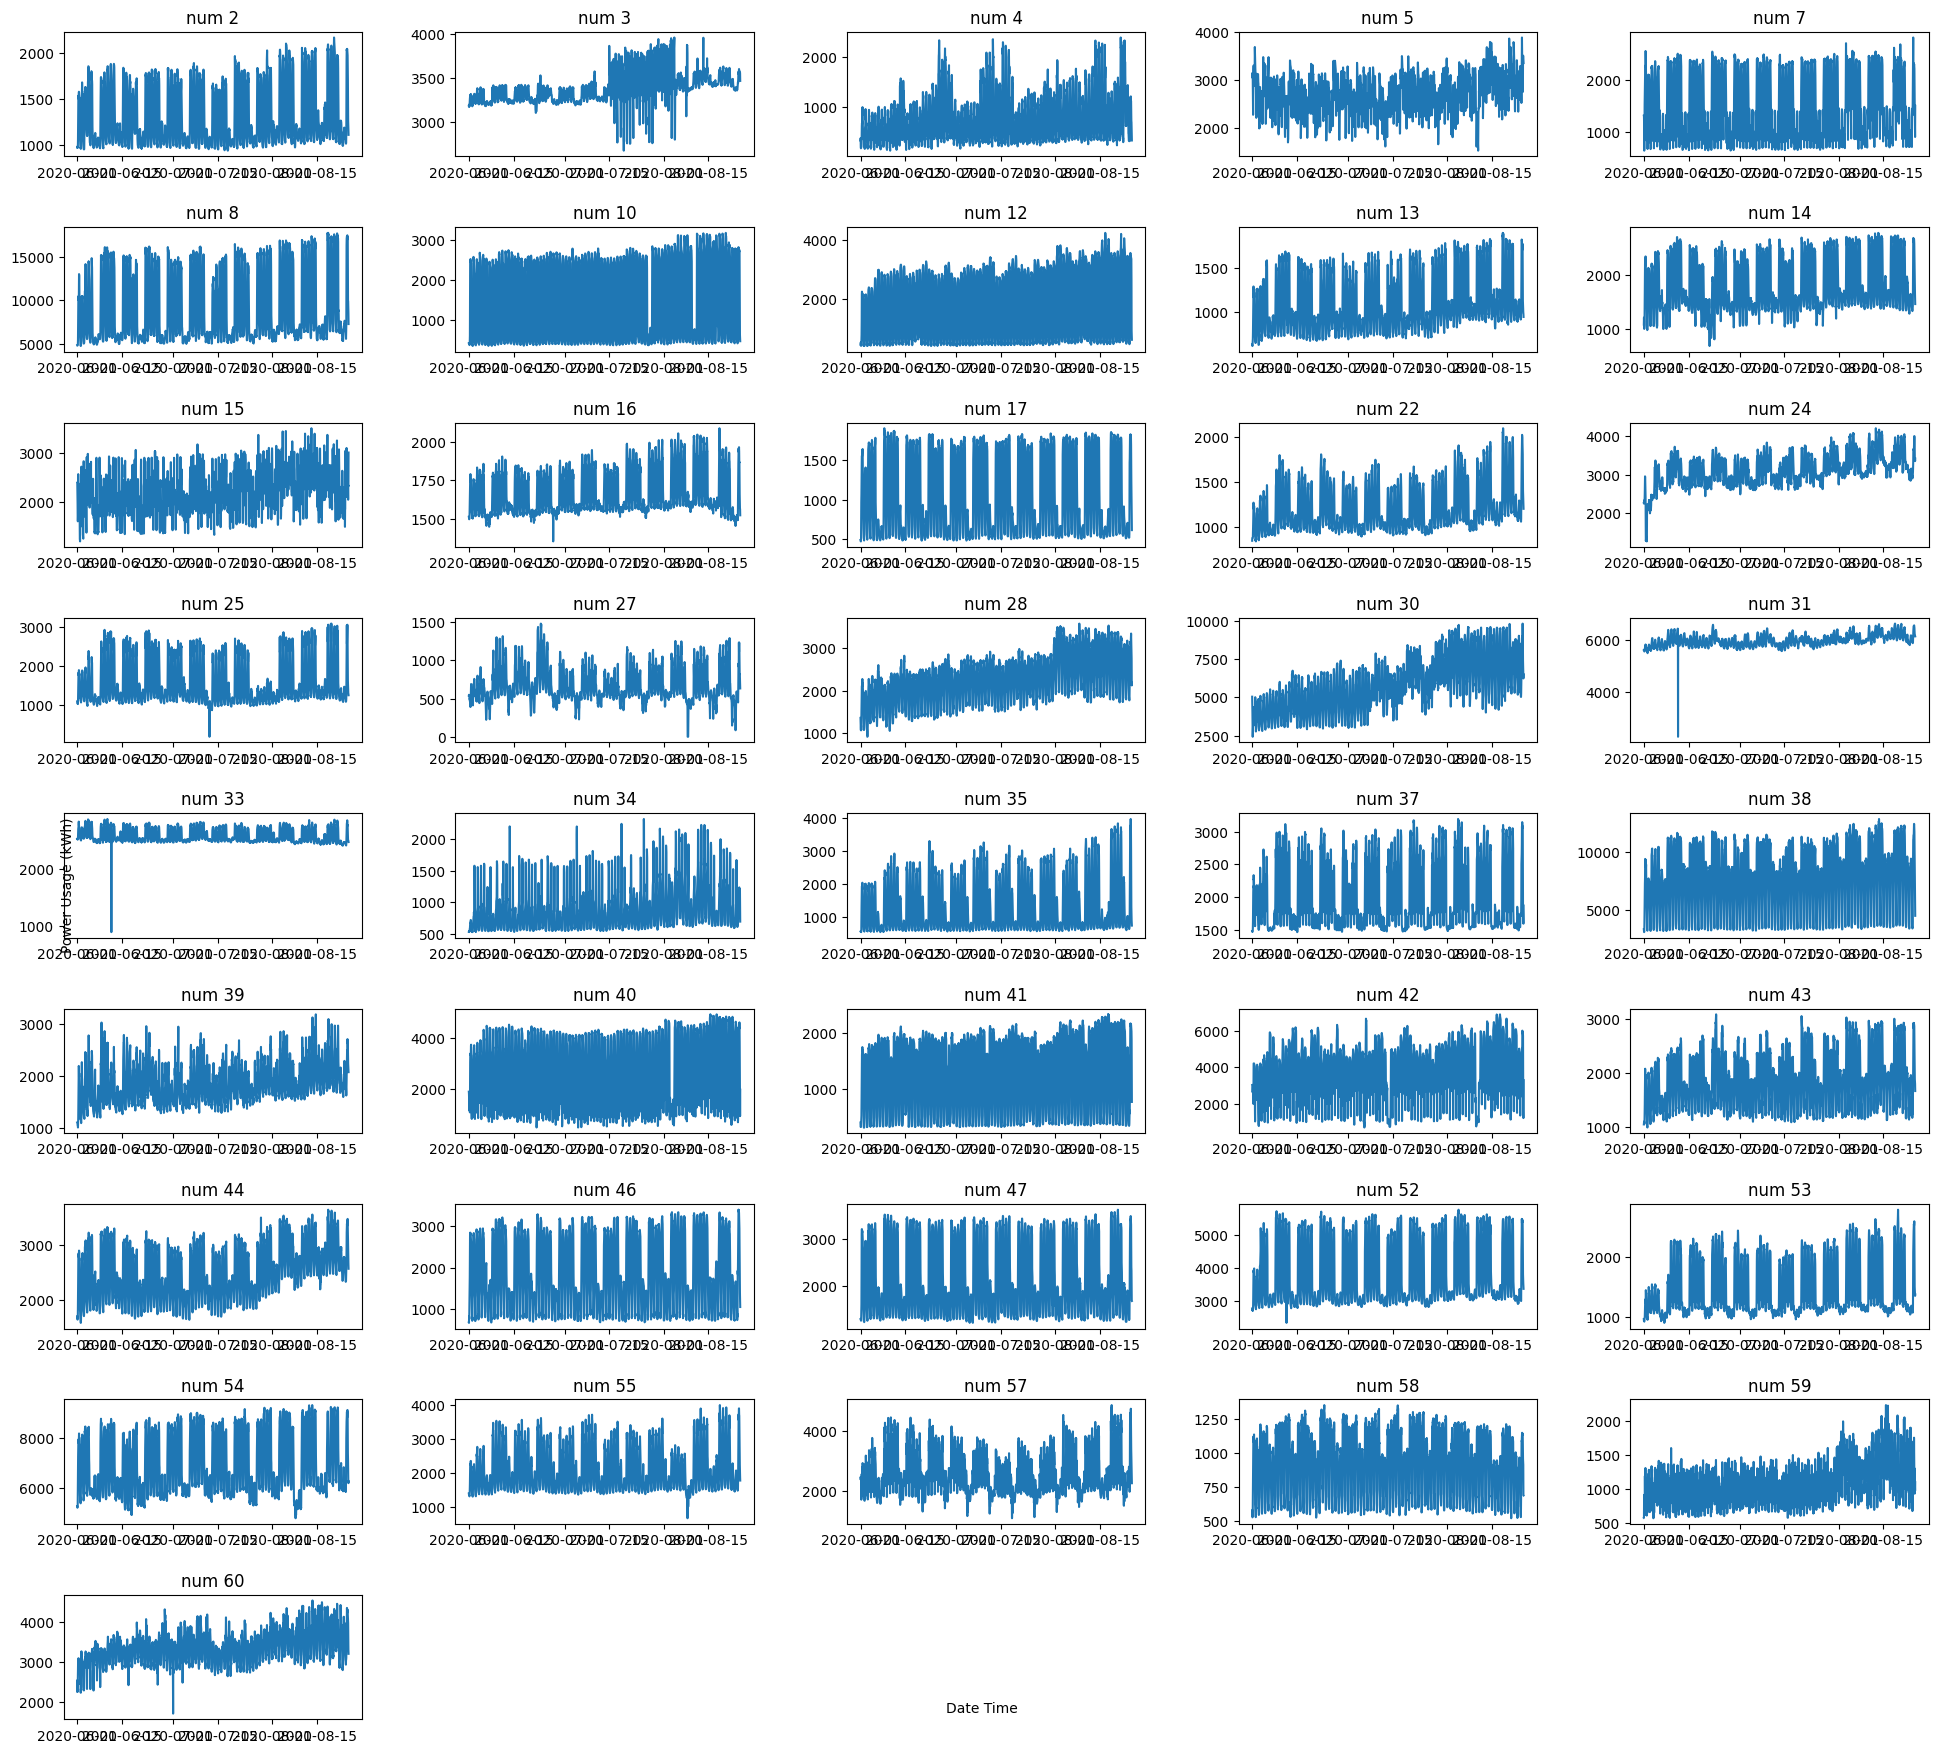

In [63]:
import math
비전기냉방설비운영= df.query('비전기냉방설비운영==1')['num'].unique()
비전기냉방설비운영

# 사용할 num 값 배열
selected_nums = 비전기냉방설비운영

# 필요한 행 수 계산 (5열로 고정)
rows = math.ceil(len(selected_nums) / 5)
cols = 5

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 2))
fig.tight_layout(pad=3.0)

# 선택된 num 값들에 대해 그래프 그리기
for idx, num in enumerate(selected_nums):
    row = idx // cols  # 행 인덱스
    col = idx % cols   # 열 인덱스
    sns.lineplot(data=df.query(f'num=={num}'), x='date_time', y='전력사용량(kWh)', ax=axes[row, col])
    axes[row, col].set_title(f'num {num}')  # 각 서브플롯 제목 설정
    axes[row, col].set_xlabel('')           # X축 레이블 제거
    axes[row, col].set_ylabel('')           # Y축 레이블 제거

# 남은 빈 서브플롯 제거
for j in range(len(selected_nums), rows * cols):
    fig.delaxes(axes.flatten()[j])

# 메인 X축과 Y축 레이블 설정
fig.text(0.5, 0.04, 'Date Time', ha='center')
fig.text(0.04, 0.5, 'Power Usage (kWh)', va='center', rotation='vertical')

plt.show()

In [69]:
remaining_nums = np.setdiff1d(df['num'].unique(), selected_nums)
remaining_nums

array([ 1,  6,  9, 11, 18, 19, 20, 21, 23, 26, 29, 32, 36, 45, 48, 49, 50,
       51, 56], dtype=int64)

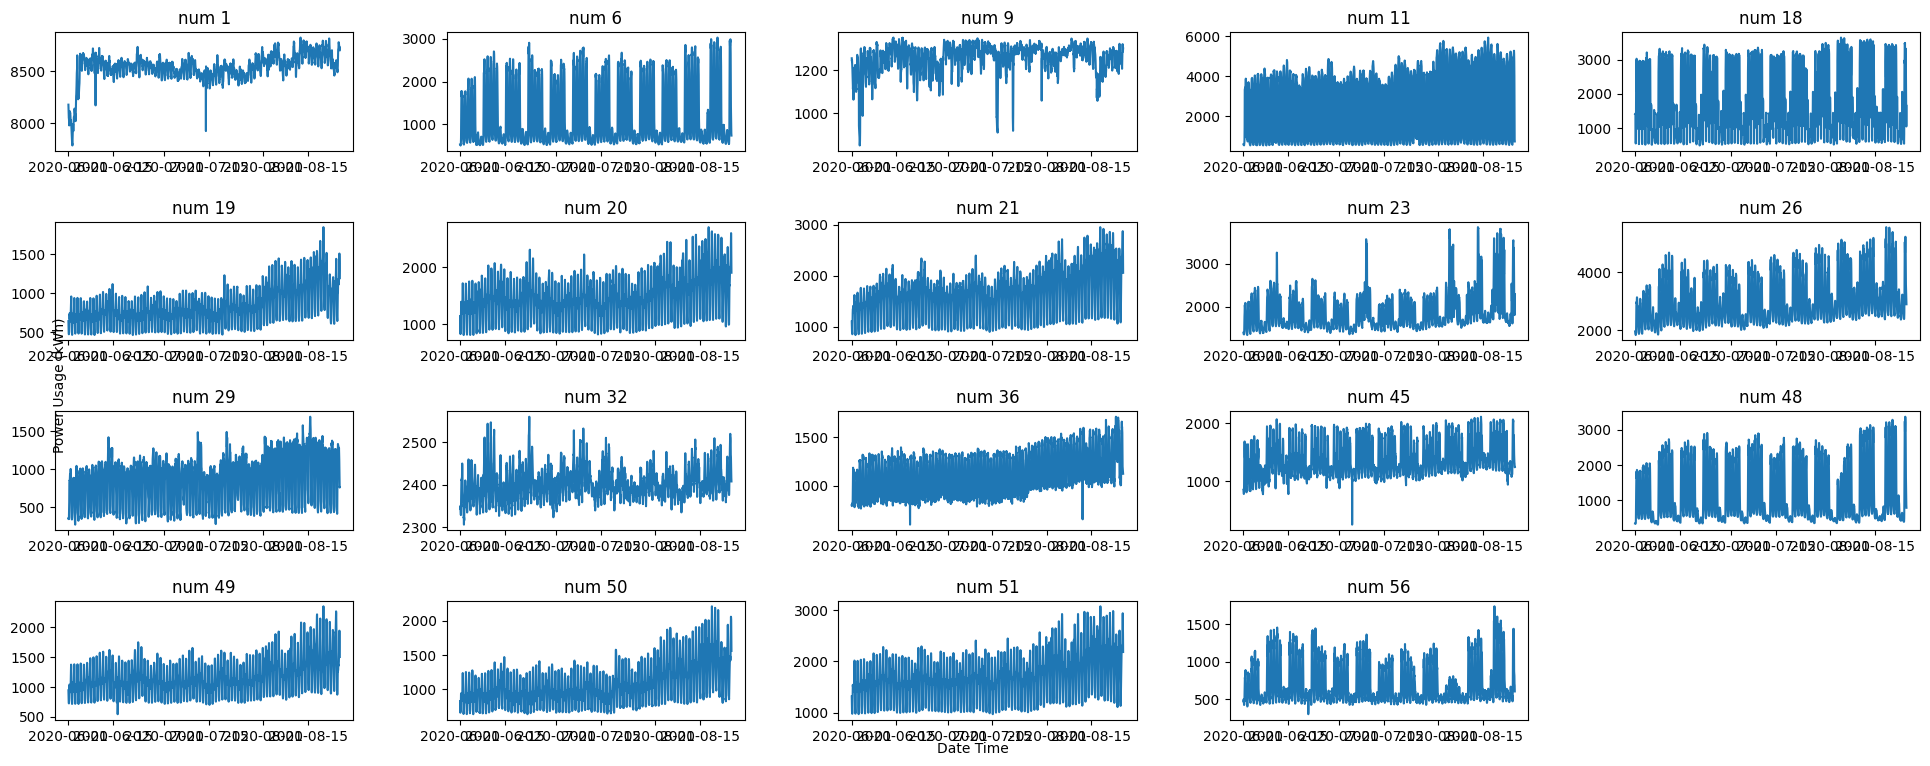

In [70]:
import math
비전기냉방설비운영= df.query('비전기냉방설비운영==1')['num'].unique()
비전기냉방설비운영

# 사용할 num 값 배열
selected_nums = remaining_nums

# 필요한 행 수 계산 (5열로 고정)
rows = math.ceil(len(selected_nums) / 5)
cols = 5

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 2))
fig.tight_layout(pad=3.0)

# 선택된 num 값들에 대해 그래프 그리기
for idx, num in enumerate(selected_nums):
    row = idx // cols  # 행 인덱스
    col = idx % cols   # 열 인덱스
    sns.lineplot(data=df.query(f'num=={num}'), x='date_time', y='전력사용량(kWh)', ax=axes[row, col])
    axes[row, col].set_title(f'num {num}')  # 각 서브플롯 제목 설정
    axes[row, col].set_xlabel('')           # X축 레이블 제거
    axes[row, col].set_ylabel('')           # Y축 레이블 제거

# 남은 빈 서브플롯 제거
for j in range(len(selected_nums), rows * cols):
    fig.delaxes(axes.flatten()[j])

# 메인 X축과 Y축 레이블 설정
fig.text(0.5, 0.04, 'Date Time', ha='center')
fig.text(0.04, 0.5, 'Power Usage (kWh)', va='center', rotation='vertical')

plt.show()

In [96]:
df.columns = df.columns.str.split('(').str[0].str.strip()
df.columns

Index(['num', 'date_time', '전력사용량', '기온', '풍속', '습도', '강수량', '일조', '비전기냉방설비운영',
       '태양광보유'],
      dtype='object')

In [106]:
# date_time이 "2020-06-01 00:00:00"인 행 필터링
filtered_df = df.query('date_time == "2020-06-01 00:00:00"')

# 각 그룹의 num 개수를 계산하여 열로 추가
filtered_df['num_count'] = filtered_df.groupby(['기온', '풍속', '습도', '강수량', '일조'])['num'].transform('count')

# 결과 확인
filtered_df

C:\Users\USER\AppData\Local\Temp\ipykernel_10452\258719427.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_df = df.query('date_time == "2020-06-01 00:00:00"')
C:\Users\USER\AppData\Local\Temp\ipykernel_10452\258719427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['num_count'] = filtered_df.groupby(['기온', '풍속', '습도', '강수량', '일조'])['num'].transform('count')


,num,date_time,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유,num_count
0,1,2020-06-01,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,15
2040,2,2020-06-01,977.184,18.3,2.5,94.0,0.0,0.0,1.0,0.0,7
4080,3,2020-06-01,3183.624,17.0,2.0,100.0,1.1,0.0,1.0,1.0,10
6120,4,2020-06-01,339.552,22.6,0.7,62.0,0.0,0.0,1.0,1.0,1
8160,5,2020-06-01,3063.744,18.3,2.5,94.0,0.0,0.0,1.0,0.0,7
10200,6,2020-06-01,527.580,17.0,2.0,100.0,1.1,0.0,0.0,0.0,10
12240,7,2020-06-01,1313.658,17.6,2.5,92.0,0.8,0.0,1.0,0.0,15
14280,8,2020-06-01,4801.977,19.1,1.1,73.0,0.0,0.0,1.0,1.0,1
16320,9,2020-06-01,1255.932,20.3,1.1,74.0,0.0,0.0,0.0,1.0,1
18360,10,2020-06-01,417.960,18.3,2.5,94.0,0.0,0.0,1.0,0.0,7


In [105]:
df.query('date_time == "2020-06-01 00:00:00"').groupby(['기온','풍속','습도','강수량','일조','num']).agg(n=('num','count'))

C:\Users\USER\AppData\Local\Temp\ipykernel_10452\3393893859.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query('date_time == "2020-06-01 00:00:00"').groupby(['기온','풍속','습도','강수량','일조','num']).agg(n=('num','count'))


n
기온   풍속  습도    강수량 일조  num   
17.0 2.0 100.0 1.1 0.0 3    1
                       6    1
                       15   1
                       18   1
                       24   1
                       25   1
                       32   1
                       41   1
                       45   1
                       54   1
17.1 2.6 94.0  0.1 0.0 12   1
                       35   1
                       42   1
                       48   1
                       60   1
17.6 2.5 92.0  0.8 0.0 1    1
                       7    1
                       17   1
                       20   1
                       21   1
                       31   1
                       34   1
                       38   1
                       46   1
                       47   1
                       49   1
                       51   1
                       52   1
                       55   1
                       58   1
18.3 2.5 94.0  0.0 0.0 2    1
                       5    1
                       10   1
                       11   1
                       19   1
                       28   1
                       50   1
18.4 2.2 86.0  0.0 0.0 56   1
18.5 1.3 95.0  0.0 0.0 36   1
18.6 0.7 94.0  0.0 0.0 14   1
18.9 0.5 89.0  0.0 0.0 16   1
     1.3 84.0  0.0 0.0 39   1
19.0 0.7 80.0  0.0 0.0 13   1
19.1 1.1 73.0  0.0 0.0 8    1
     1.7 94.0  0.0 0.0 29   1
19.3 2.2 99.0  0.0 0.0 30   1
19.4 0.8 81.0  0.0 0.0 26   1
19.5 1.9 89.0  0.0 0.0 44   1
                       57   1
19.8 1.2 77.0  0.0 0.0 59   1
19.9 1.4 83.0  0.0 0.0 22   1
                       23   1
                       33   1
                       40   1
                       53   1
     1.9 60.0  0.0 0.0 37   1
20.2 2.0 64.0  0.0 0.0 27   1
20.3 1.1 74.0  0.0 0.0 9    1
20.7 0.8 65.0  0.0 0.0 43   1
22.6 0.7 62.0  0.0 0.0 4    1

In [95]:
df.query('date_time == "2020-06-01 00:00:00"')['기온'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_10452\3578986727.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query('date_time == "2020-06-01 00:00:00"')['기온'].unique()


array([17.6, 18.3, 17. , 22.6, 19.1, 20.3, 17.1, 19. , 18.6, 18.9, 19.9,
       19.4, 20.2, 19.3, 18.5, 20.7, 19.5, 18.4, 19.8])

In [92]:
df.query('date_time == "2020-06-01 00:00:00"')['기온'].unique()
df.query('date_time == "2020-06-01 00:00:00"')['기온'].unique()
df.query('date_time == "2020-06-01 00:00:00" & 기온==17.6')['num'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_10452\838793616.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query('date_time == "2020-06-01 00:00:00"')['기온'].unique()
C:\Users\USER\AppData\Local\Temp\ipykernel_10452\838793616.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query('date_time == "2020-06-01 00:00:00" & 기온==17.6')['num'].unique()


array([ 1,  7, 17, 20, 21, 31, 34, 38, 46, 47, 49, 51, 52, 55, 58],
      dtype=int64)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   num        122400 non-null  int64         
 1   date_time  122400 non-null  datetime64[ns]
 2   전력사용량      122400 non-null  float64       
 3   기온         122400 non-null  float64       
 4   풍속         122400 non-null  float64       
 5   습도         122400 non-null  float64       
 6   강수량        122400 non-null  float64       
 7   일조         122400 non-null  float64       
 8   비전기냉방설비운영  122400 non-null  float64       
 9   태양광보유      122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


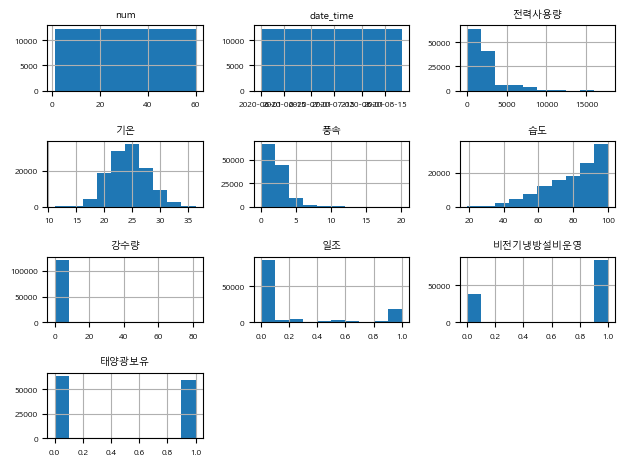

In [113]:
plt.rc('font', family='Malgun Gothic',size=6)
df.hist()
plt.tight_layout(pad=2.0)

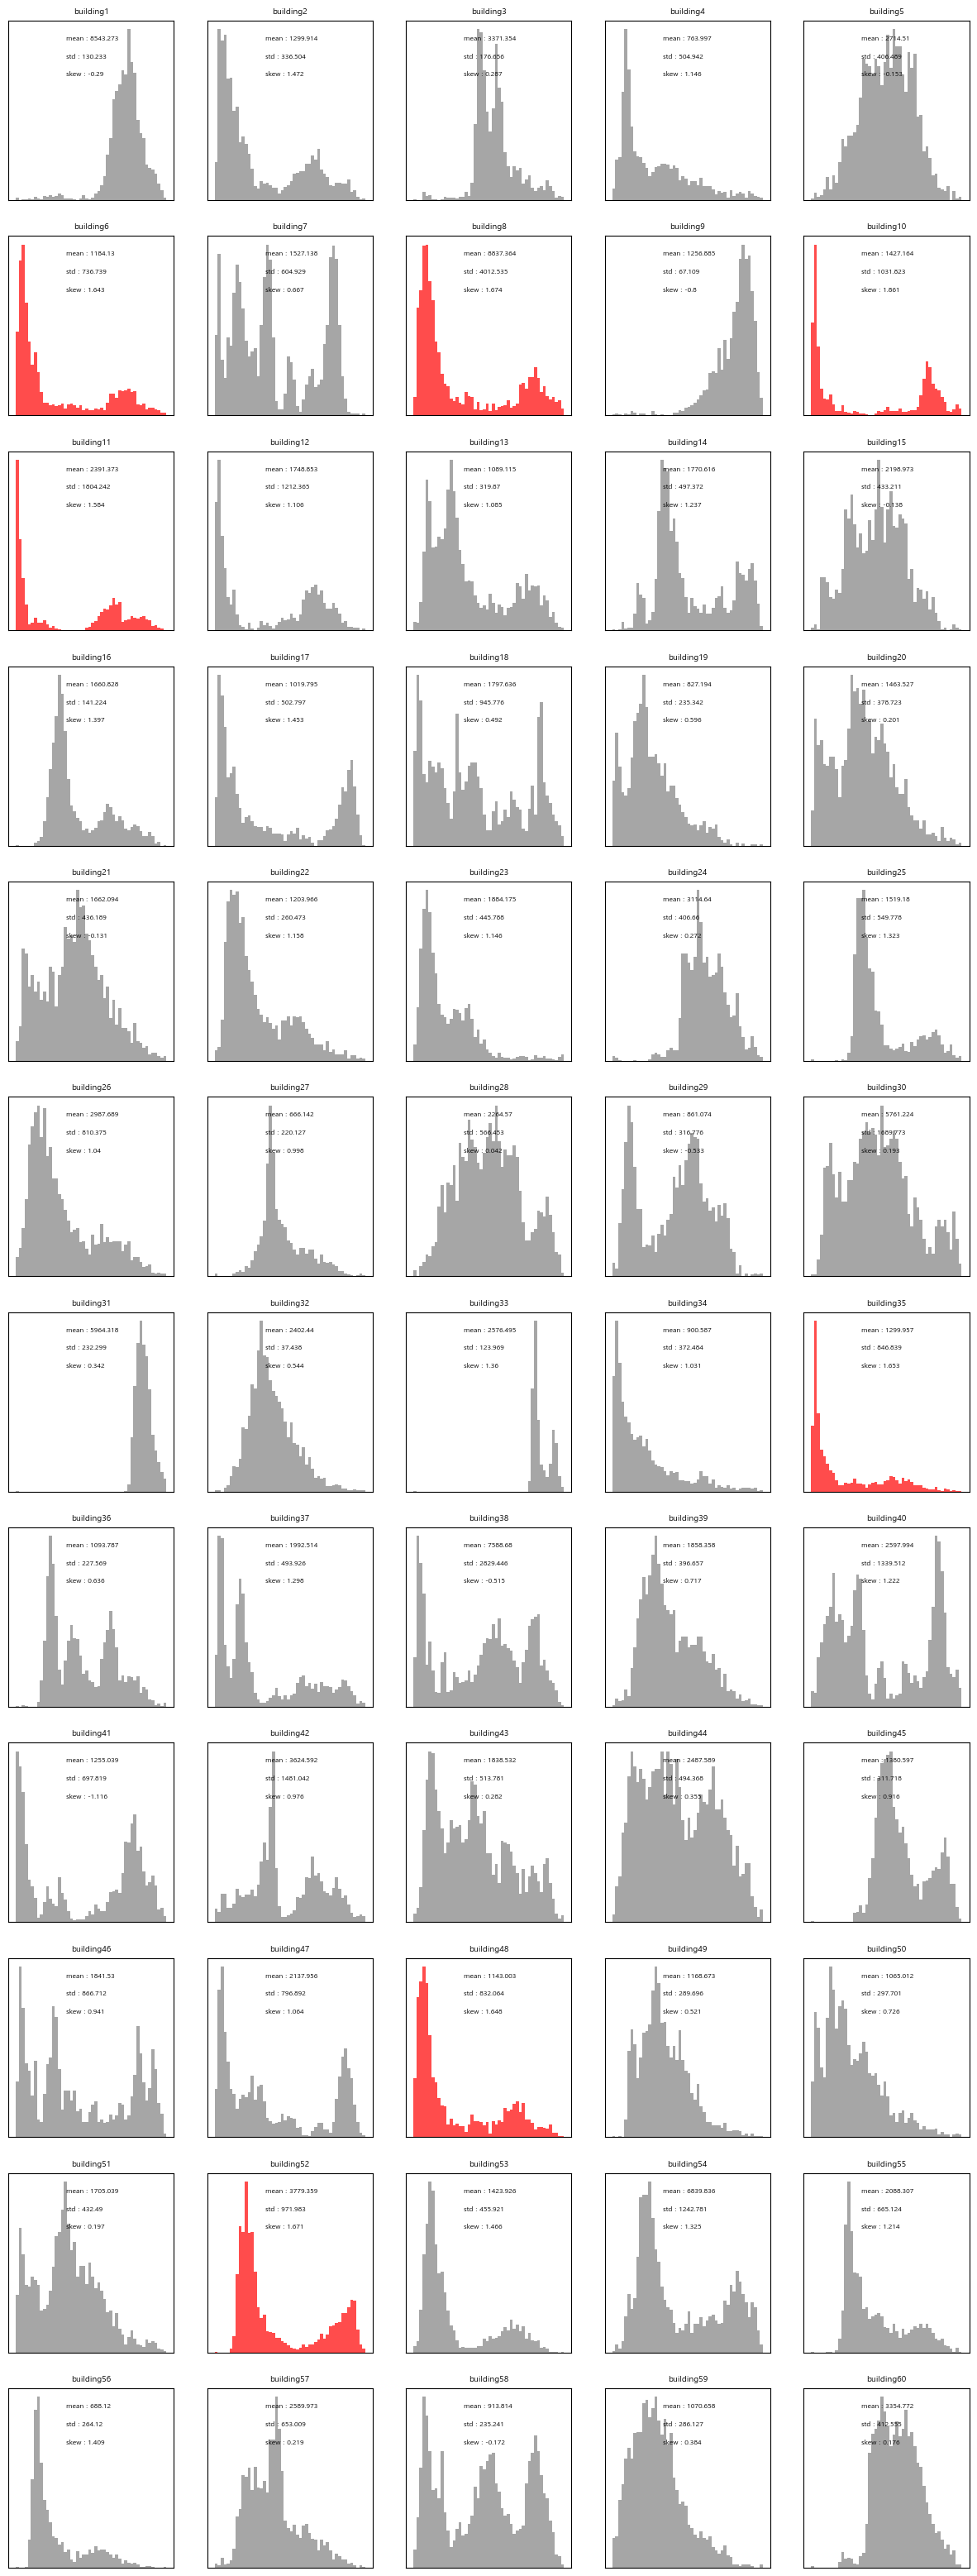

In [120]:
fig = plt.figure(figsize = (15, 40))
for num in range(1,61):
    ax = plt.subplot(12, 5, num)
    energy = df.loc[df.num == num, '전력사용량'].values
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy))/energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
    plt.title(f'building{num}')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

In [126]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['weekday'] = df['date_time'].dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   num        122400 non-null  int64         
 1   date_time  122400 non-null  datetime64[ns]
 2   전력사용량      122400 non-null  float64       
 3   기온         122400 non-null  float64       
 4   풍속         122400 non-null  float64       
 5   습도         122400 non-null  float64       
 6   강수량        122400 non-null  float64       
 7   일조         122400 non-null  float64       
 8   비전기냉방설비운영  122400 non-null  float64       
 9   태양광보유      122400 non-null  float64       
 10  month      122400 non-null  int32         
 11  day        122400 non-null  int32         
 12  hour       122400 non-null  int32         
 13  weekday    122400 non-null  object        
dtypes: datetime64[ns](1), float64(8), int32(3), int64(1), object(1)
memory usage: 11.7+ MB


In [124]:
sns.heatmap(df.query('num==1'),x='date_time', y='전력사용량')

TypeError: float() argument must be a string or a real number, not 'Timestamp'